In [1]:

import pandas as pd
import numpy as np
import cv2 
import sklearn.model_selection
import pickle


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
users = pd.read_csv("Data/Users/Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
# users['Age'].isnull().sum()


In [5]:
books = pd.read_csv("Data/Books/Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings = pd.read_csv("Data/Ratings/Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
ratings['Book-Rating'].value_counts()                      # Rating lies between 0 - 10 

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

# unique book counts

In [8]:
books['ISBN'].nunique()

271360

In [9]:
ratings['ISBN'].nunique()

340556

##Report

we have only 271360 unique book in my book dataset but when i analysed  rating dataset then there are some other books also ,we don't have dataset of these another books 

#Analysis the data

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Report --> we don't neeD column  Location and Age from users  dataset as persent in rating dataset  So, we need only 
User-ID

In [13]:
ratings['User-ID'].nunique()                    # Total unique users

105283

In [14]:
books['Book-Title'].nunique()                       # Total unique book title

242135

# Merge data
merge dataset books and ratings  into one dataset callled as population_data 

In [15]:
population_data = pd.merge(left=ratings ,right=books,on='ISBN')
population_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Analysis these Population datasets 

In [16]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [17]:
population_data.shape[0]

1031136

In [18]:
population_data['Book-Title'].nunique(),population_data['ISBN'].nunique()

(241071, 270151)

In [19]:
population_data.shape[0] , population_data['Book-Author'].nunique() , population_data['Publisher'].nunique()

(1031136, 101588, 16729)

In [20]:
population_data2 = population_data

population_data2 = pd.to_numeric(population_data2['Year-Of-Publication'] , errors='coerce')   # object to numeric



In [21]:
population_data2.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64


## Popularity based recommandation system
-> popularity based recommandation system genrally works on formula. or simple word<br>
-> if a website has different collection of list. but it will suggest only those collection, which are 
   highly present on this website, or that website is highly famous by those product.<br>
-> so this is book dataset and we are selecting best books, which are available in this dataset. we will suggest all    those books<br>
for the popularity based recommandation.<br>
### so this is my condition to select best books
we are selecting only those books, on which minimun  250 users give the rating<br>
and those books has highest average  in rating.


In [22]:
population_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [23]:
num_rating_df= population_data.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [24]:
avg_rating_df = population_data.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


## num_rating define how many times rated this book, and avg_rating of the particular book

In [25]:
popular_df= num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [26]:
popular_df.info()
popular_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241071 entries, 0 to 241070
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Book-Title  241071 non-null  object 
 1   num_rating  241071 non-null  int64  
 2   avg_rating  241071 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ MB


,num_rating,avg_rating
count,241071.000000,241071.000000
mean,4.277312,2.890137
std,16.738685,3.268984
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.971429
75%,3.000000,5.000000
max,2502.000000,10.000000


In [27]:
import seaborn as sns

In [28]:
from matplotlib  import pyplot as plt

<Axes: xlabel='num_rating', ylabel='Density'>

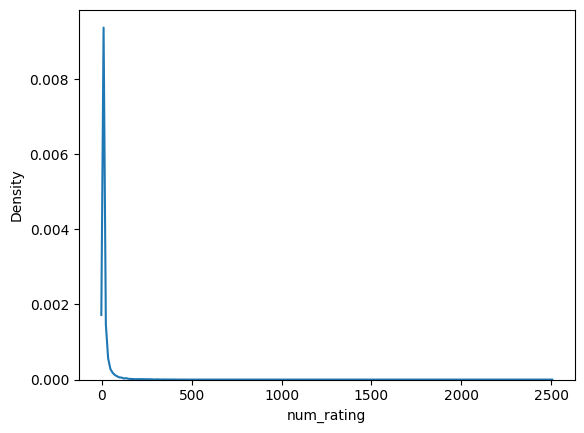

In [29]:
sns.kdeplot(popular_df['num_rating'])

In [30]:
popular_df[popular_df['num_rating']>=250]

,Book-Title,num_rating,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [31]:
popular_df = popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False)
popular_df

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [32]:
top_50_num_rating = popular_df.head(50)
top_50_num_rating

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


### agained i joined top books data to the book dataset, to get additional information about these books

In [33]:
best_books =popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')
best_books.head()

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...


In [34]:
best_books['Book-Title'].duplicated().sum()  # no duplicate book are persent in my dataset

0

In [35]:
final_data_for_popularity_best_recommandation=best_books[['Book-Title','num_rating','avg_rating','Book-Author','Publisher','Image-URL-M']].head(80)
final_data_for_popularity_best_recommandation.head()

,Book-Title,num_rating,avg_rating,Book-Author,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...


In [36]:
final_data_for_popularity_best_recommandation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Title   80 non-null     object 
 1   num_rating   80 non-null     int64  
 2   avg_rating   80 non-null     float64
 3   Book-Author  80 non-null     object 
 4   Publisher    80 non-null     object 
 5   Image-URL-M  80 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ KB


## to save the best books data of 80 books, this data will works as like popularity based recommandation system.

In [37]:
final_data_for_popularity_best_recommandation.to_csv('Data/popularity_based.csv',index=False)

In [38]:
import pickle

In [69]:
with open('popular.pkl', 'wb') as file:
    pickle.dump(final_data_for_popularity_best_recommandation, file)

# Collaborative filtering based recommender System 
### all those user's which gave the rating on maximum 250 times on a book and consider all those books on which user rated greater than 80 times.


In [39]:
population_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [40]:
population_data.groupby('User-ID').count()['Book-Rating']>250 

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [41]:
x=population_data.groupby('User-ID').count()['Book-Rating']>250
continuous_learner_id= x[x].index
continuous_learner_id

Int64Index([   254,   2276,   2766,   3363,   4385,   6251,   6543,   6575,
              7158,   7346,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=613)

In [42]:
full_detail_of_continuous_learner=population_data[population_data['User-ID'].isin(continuous_learner_id)]
full_detail_of_continuous_learner.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [43]:
book_title= full_detail_of_continuous_learner.groupby('Book-Title').count()['Book-Rating']>=50
good_books=book_title[book_title].index
print(good_books.shape)
good_books



# i have only 574 those books on which our continues learner given the rating greater than 50 time

(574,)


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Fine Balance',
       'A Heartbreaking Work of Staggering Genius',
       ...
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=574)

In [44]:
final_filtered_data=full_detail_of_continuous_learner[full_detail_of_continuous_learner['Book-Title'].isin(good_books)]
final_filtered_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [45]:
final_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45093 entries, 63 to 1030868
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              45093 non-null  int64 
 1   ISBN                 45093 non-null  object
 2   Book-Rating          45093 non-null  int64 
 3   Book-Title           45093 non-null  object
 4   Book-Author          45093 non-null  object
 5   Year-Of-Publication  45093 non-null  object
 6   Publisher            45093 non-null  object
 7   Image-URL-S          45093 non-null  object
 8   Image-URL-M          45093 non-null  object
 9   Image-URL-L          45093 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


In [46]:
final_filtered_data['Book-Title'].nunique()

574

### Transform the data to get check cosine simlarity in between all famous books.

index ===>  Book-Title<br>
columns ===> User-ID<br>
values  ===> Book-Ratings
           
before transform no. of entry = 45093<br>
after transform no. of entry =  574  <br>
due to index. because index does not contain duplicat entry.

In [47]:
pivot_table = final_filtered_data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot_table.head()

## all books are vector, which can represent by 613 dimension space. it is no. of columns
## and on the columns there is users

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 1984 to \O\" Is for Outlaw"
Columns: 613 entries, 254 to 278418
dtypes: float64(613)
memory usage: 2.7+ MB


In [49]:
pivot_table.fillna(0 ,inplace = True)
pivot_table


User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
unique_books_name = pivot_table.index
pd.Series(unique_books_name).to_csv('Data/unique_book_name.csv',index=False)

## i saved all those unque books name on which i found the cosine simlarity score

In [51]:
pivot_table.to_csv('Data/vector_table.csv',index=False)       

## to save the transform data to get a cosine simlarity score in between books

## from sklearn.metrics.pairwise import cosine_similarity
and now cosine simalarity will calculate the simalarity in between all books.<br>
and it will return simlarity score in between all the books.<br>
in my dataset index has books name which will pointing on 613 dimension chart. and cosine simlarity<br>
will calculate the simlarity in between all books. all are columns in this case just like cordinate of book<br>
which will deside the position of pointing a book on 613 dimension chart.<br>
cosine will take first book and calculate the simlarity by making to other all remainin books.<br>
thats why cosine simlarity load from the pairwise module.<br>
cosine simlarity calculate the simlarity in between two data points, by drawing straigth line <br>
from data points to the origin, and make a angle after calculate the angle or "Q" value. and passed into <br>
cosQ and get value of cosQ will be simlarity.


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_score= cosine_similarity(pivot_table)
similarity_score

array([[1.        , 0.12637786, 0.01584756, ..., 0.1387288 , 0.08450515,
        0.0521102 ],
       [0.12637786, 1.        , 0.28824811, ..., 0.08010424, 0.18117097,
        0.1617243 ],
       [0.01584756, 0.28824811, 1.        , ..., 0.05165773, 0.05618509,
        0.12893887],
       ...,
       [0.1387288 , 0.08010424, 0.05165773, ..., 1.        , 0.07113412,
        0.02067643],
       [0.08450515, 0.18117097, 0.05618509, ..., 0.07113412, 1.        ,
        0.11219793],
       [0.0521102 , 0.1617243 , 0.12893887, ..., 0.02067643, 0.11219793,
        1.        ]])

In [53]:
similarity_score.shape
# we have 574 unique books.
# and we have calculated the simlarity between

(574, 574)

In [54]:
similarity_score.shape[0]

#shape of the first record of simlarity_score
# it contains simlarity score of first book with respect to other books

574

In [55]:
similarity_score[0][0:5]      # simlarity of first book to first  top 5 books

array([1.        , 0.12637786, 0.01584756, 0.        , 0.06583148])

In [56]:
sorted(list(enumerate(similarity_score[0])))[0:5]

## now it is sorted by the enumerate index value but we want to sort the by simlarity so see in next step

[(0, 0.9999999999999998),
 (1, 0.12637786224606287),
 (2, 0.015847561142978476),
 (3, 0.0),
 (4, 0.06583147624087993)]

In [57]:
sorted(list(enumerate(similarity_score[0])),key =lambda x:x[1],reverse=True)[0:5]


# now its sorted by the simlarity score descending order. which means there is first book which are highly
# similar to this book but this score for the byitself book.
# because cosine simlarity make the pair with each other included itself.

[(0, 0.9999999999999998),
 (433, 0.31663755334122123),
 (514, 0.28195011538876225),
 (439, 0.2775401170783511),
 (67, 0.2731957063983398)]

In [58]:
unique_books_name           # all books name on which we have build the recommendation system

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Fine Balance',
       'A Heartbreaking Work of Staggering Genius',
       ...
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=574)

In [59]:
data_to_get_more_detail=population_data[population_data['Book-Title'].isin(unique_books_name)]
data_to_get_more_detail.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
64,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [60]:
def recommend(book_name):
    index = list(pivot_table.index==book_name).index(True)       # index fetch of the book from the pivot table
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:9]    
    # i skipped first entry because it is itself,and fetching  first 10 books simlarity score
    data = []
    # loop to get other additional information  about books
    for i in similar_items:
        item = []      # to get all details of the about book
        temp_df = data_to_get_more_detail[data_to_get_more_detail['Book-Title'] == pivot_table.index[i[0]]]
        # matching the book_name extracting from pivotTable to actual dataset
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))   # extracting book-title of this book
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))  # extracting book-author of this book
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))  # extracting image-url of this book
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))  # extracting publisher of this book
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Rating'].values))  # extracting Book-Rating of this book
        
        data.append(item)     # appending details of books one by one into the the data list  
    return data   # i am returning only 8 most similar books

In [61]:
recomended_8_books_infrom  = recommend('1984')
print(f"this  is the 8 recommended books data which are most similar to this book '1984' and length of this data {len( recommend('1984'))} ")
recomended_8_books_infrom

this  is the 8 recommended books data which are most similar to this book '1984' and length of this data 8 


[["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg',
  'Fawcett Books',
  0],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg',
  'Ballantine Books',
  0],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0374172897.01.MZZZZZZZ.jpg',
  'Farrar, Straus and Giroux',
  0],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg',
  'Harpercollins',
  8],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0804114986.01.MZZZZZZZ.jpg',
  'Ballantine Books',
  0],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J. R. R. Tolkien',
  'http://images.amazon.com/images/P/0618129030.01.MZZZZZZZ.jpg',
  'Houghton Mifflin Company',
  8],
 ['Fahrenheit 451',
  'RAY BRADBURY',
  'http://images.amazon.com/images/P/0345342968.01.MZ

In [62]:
recomended_8_books_infrom[5]         # this is information about single book

# book-title
# book-author
# book-image-url
# book-publisher
# book-Rating

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'J. R. R. Tolkien',
 'http://images.amazon.com/images/P/0618129030.01.MZZZZZZZ.jpg',
 'Houghton Mifflin Company',
 8]

  ### save the necessary data and similarity_score and building a API page. for final representation of our project

In [63]:

import joblib
joblib.dump(data_to_get_more_detail,'collaborative_models/collaborative_recmdsystem_data.lb')         # save book the data as a model
joblib.load('collaborative_models/collaborative_recmdsystem_data.lb')             # to load this again

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
64,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1027250,268134,0385091907,0,Anne Frank: The Diary of a Young Girl,Anne Frank,1967,Random House Childrens Pub,http://images.amazon.com/images/P/0385091907.0...,http://images.amazon.com/images/P/0385091907.0...,http://images.amazon.com/images/P/0385091907.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...


In [64]:
joblib.dump(pivot_table,'models/pivot_table_data.lb')   # save transform pivot_table data the data as a model
joblib.load('models/pivot_table_data.lb')                # to load this again

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
joblib.dump(similarity_score,'models/similarity_score.lb')        # to save the similarity score
joblib.load('models/similarity_score.lb')              # to load this again

array([[1.        , 0.12637786, 0.01584756, ..., 0.1387288 , 0.08450515,
        0.0521102 ],
       [0.12637786, 1.        , 0.28824811, ..., 0.08010424, 0.18117097,
        0.1617243 ],
       [0.01584756, 0.28824811, 1.        , ..., 0.05165773, 0.05618509,
        0.12893887],
       ...,
       [0.1387288 , 0.08010424, 0.05165773, ..., 1.        , 0.07113412,
        0.02067643],
       [0.08450515, 0.18117097, 0.05618509, ..., 0.07113412, 1.        ,
        0.11219793],
       [0.0521102 , 0.1617243 , 0.12893887, ..., 0.02067643, 0.11219793,
        1.        ]])

In [66]:
popular_df

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [67]:
population_data['Image-URL-M'][0]

'http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg'